In [27]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm

In [28]:
def initialize():
    qfunction = {}
    returns = {}
    policy = {}
    for mysum in range(12, 22):
        for dealsum in range(1,11):
            for ace in [True, False]:
                idx = (mysum, dealsum, ace)
                qfunction[tuple(list(idx)+[0])] = np.random.rand()
                qfunction[tuple(list(idx)+[1])] = np.random.rand()
                returns[tuple(list(idx)+[0])] = []
                returns[tuple(list(idx)+[1])] = []
                policy[idx] = 0
    return qfunction, returns, policy

In [64]:
qfunction, returns, policy = initialize()
games = int(500000)
gamma = 0.9

In [65]:
for game in tqdm(range(games)):
    episode = []
    obs = env.reset()
    action = np.random.choice([0,1])
    
    if obs not in policy.keys():
        continue
        
    while True:
        new, reward, done, desc = env.step(action)
        episode.append((obs, action, reward))
        obs = new
        if done:
            break
        else:
            action = policy[obs]
            
            
            
    G=0
    for T, step in enumerate(reversed(episode)):
        state, action, reward = step
        if tuple(list(state)+[action]) not in qfunction.keys():
            continue
        G = gamma * G + int(reward)
        if state not in [step[0] for step in episode[:-T-1]]:
            returns[tuple(list(state)+[action])].append(G)
            qfunction[tuple(list(state)+[action])] = np.average(returns[tuple(list(state)+[action])])
            policy[state] = max([0,1], key= lambda x: qfunction[tuple(list(state)+[x])])

100%|██████████| 500000/500000 [03:00<00:00, 2763.97it/s]


In [66]:
vfunction = {}
for mysum in range(12, 22):
    for dealsum in range(1,11):
        for ace in [True, False]:
            idx = (mysum, dealsum, ace)
            vfunction[idx] = qfunction[tuple(list(idx)+[policy[idx]])]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


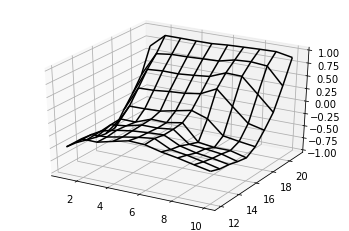

In [67]:
noace = [v[1] for v in vfunction.items() if v[0][-1]==False]
noace = np.array(noace).reshape(10,10)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
X = np.arange(1, 11, 1)
Y = np.arange(12, 22, 1)
X, Y = np.meshgrid(X, Y)
Z = noace
surf = ax.plot_wireframe(X, Y, Z, color='black')
ax.set_zlim(-1.01, 1.01)
fig.show()

In [68]:
noace = [v[1] for v in policy.items() if v[0][-1]==False]
noace = np.array(noace).reshape(10,10)

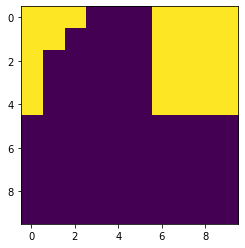

In [69]:
plt.imshow(noace)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


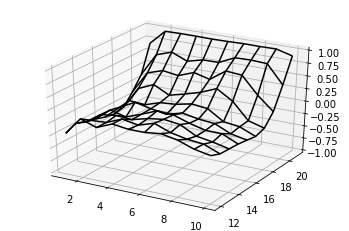

In [70]:
ace = [v[1] for v in vfunction.items() if v[0][-1]==True]
ace = np.array(ace).reshape(10,10)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
X = np.arange(1, 11, 1)
Y = np.arange(12, 22, 1)
X, Y = np.meshgrid(X, Y)
Z = ace
surf = ax.plot_wireframe(X, Y, Z, color='black')
ax.set_zlim(-1.01, 1.01)
fig.show()

In [71]:
ace = [v[1] for v in policy.items() if v[0][-1]==True]
ace = np.array(ace).reshape(10,10)

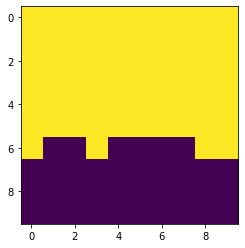

In [72]:
plt.imshow(ace)